In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Position_Salaries.csv")

In [6]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [10]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [11]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [17]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
 
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)
 
print("✅ Models Trained Successfully!")
 
 

✅ Models Trained Successfully!


Text(0, 0.5, 'Salary')

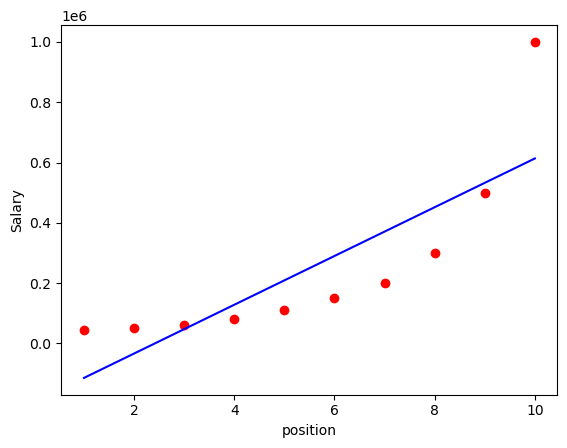

In [18]:
plt.scatter(x,y,color = 'red')
plt.plot(x,lin_reg.predict(x),color='blue')
plt.xlabel("position")
plt.ylabel("Salary")


Text(0, 0.5, 'Salary')

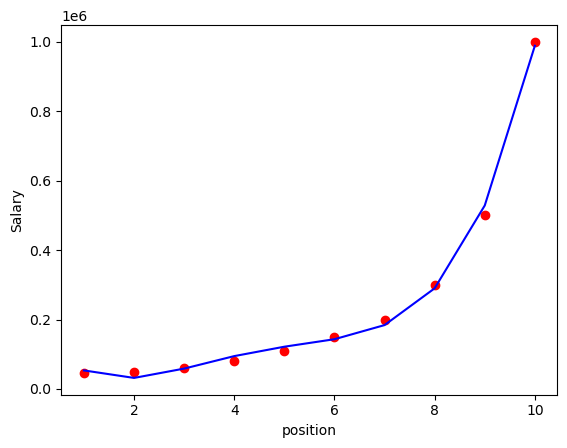

In [19]:
plt.scatter(x,y,color = 'red')
plt.plot(x,lin_reg_2.predict(poly_reg.fit_transform(x)),color='blue')
plt.xlabel("position")
plt.ylabel("Salary")


In [21]:
import numpy as np

In [22]:
linear_prediction = lin_reg.predict(np.array([6,5]).reshape(-1, 1))
print("Linear regression prediction for 6,5:",linear_prediction)

Linear regression prediction for 6,5: [289939.39393939 209060.60606061]


In [29]:
# Predict on full dataset using polynomial features
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_poly_pred = lin_reg_2.predict(poly_reg.transform(x))

# Metrics
mse_poly = mean_squared_error(y, y_poly_pred)
mae_poly = mean_absolute_error(y, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y, y_poly_pred)

# Print metrics
print("Polynomial Regression Metrics")
print("Mean Squared Error (MSE):", mse_poly)
print("Mean Absolute Error (MAE):", mae_poly)
print("Root Mean Squared Error (RMSE):", rmse_poly)
print("R2 Score:", r2_poly)


Polynomial Regression Metrics
Mean Squared Error (MSE): 210343822.8438184
Mean Absolute Error (MAE): 12681.81818184008
Root Mean Squared Error (RMSE): 14503.234909626832
R2 Score: 0.9973922891706614


In [30]:
y_pred=lin_reg.predict(x)

# Metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y, y_pred)

# Print metrics
print("Polynomial Regression Metrics")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


Polynomial Regression Metrics
Mean Squared Error (MSE): 26695878787.878788
Mean Absolute Error (MAE): 128454.54545454546
Root Mean Squared Error (RMSE): 163388.73519272613
R2 Score: 0.6690412331929895
